# Part 1: Data Cleaning and Preparation
---
<font size="3">We noticed that certain images are not blobbed correctly after running the blob2.py file. Therefore, our initial step in the project was to clean and prepare the dataset. This process aimed to extract relevant information from the dataset and address the question we posed.

<font size="3">**Question:** Would it be possible to achieve detection of fire via images?

<font size="3">**Dataset:** [FIRE Dataset on Kaggle](https://www.kaggle.com/datasets/phylake1337/fire-dataset)
    
<img align="center" src="./images/IntroPic.jpeg" width="500">

In [5]:
# Required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

# Ignores minor warning
# warnings.filterwarnings("ignore", category=UserWarning)

# Set Default Style For Seaborn
sb.set()

## Importing Dataset

In [6]:
# Read the output file created by the blob2.py
output_data = pd.read_csv('output/output_stats.csv')
# Taking a quick glance at the records
output_data

,image_name,size,avg_b,avg_g,avg_r,avg_h,avg_s,avg_v,std_b,std_g,std_r,std_h,std_s,std_v,blob_count,fire
0,fire.753.png,212006.249406,12.762858,58.227147,128.101673,23.471463,90.183275,50.235950,14.344682,32.551522,56.165869,27.394566,73.766898,22.089614,196,1
1,fire.12.png,89993.726291,79.223567,94.076952,120.520141,22.697020,34.083370,47.262800,34.028104,40.216131,47.696931,54.450719,26.780617,18.747861,674,1
2,fire.747.png,127812.689117,11.252800,50.830994,146.716680,17.358378,92.243588,57.535953,16.273683,30.098781,55.654497,22.142658,70.165380,21.828507,112,1
3,non_fire.134.png,74.031425,79.740180,98.578563,112.221661,33.281164,28.724898,44.008495,35.130677,37.466454,38.219430,98.858972,10.754184,15.152674,109,0
4,non_fire.120.png,60543.177855,30.268923,56.112125,83.654148,29.062445,63.831749,32.805548,20.011667,27.694207,32.653572,42.011713,37.239195,12.812618,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,non_fire.105.png,3572.663253,61.677173,134.101486,153.048860,47.195778,60.704673,60.019161,43.256935,49.891797,52.677128,64.005410,19.288945,20.795986,1135,0
994,non_fire.111.png,44263.831015,40.544953,77.078043,92.381158,40.596951,55.156732,36.227905,23.371124,35.151004,36.411559,59.935268,35.255025,14.314416,359,0
995,non_fire.139.png,72203.953299,48.689633,81.162745,94.796882,41.738855,48.645155,37.175248,28.332560,31.640191,32.641139,54.236804,13.312730,12.845786,767,0
996,fire.37.png,2887.842553,134.745682,159.235544,223.215770,17.176032,39.593107,87.535596,18.603283,27.245786,26.462156,65.558191,34.891504,10.974747,14,1


In [7]:
# Obtain general information on unfiltered dataset
output_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  998 non-null    object 
 1   size        998 non-null    float64
 2   avg_b       998 non-null    float64
 3   avg_g       998 non-null    float64
 4   avg_r       998 non-null    float64
 5   avg_h       998 non-null    float64
 6   avg_s       998 non-null    float64
 7   avg_v       998 non-null    float64
 8   std_b       998 non-null    float64
 9   std_g       998 non-null    float64
 10  std_r       998 non-null    float64
 11  std_h       998 non-null    float64
 12  std_s       998 non-null    float64
 13  std_v       998 non-null    float64
 14  blob_count  998 non-null    int64  
 15  fire        998 non-null    int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 124.9+ KB


## Dropping Rows With Size Zero
<font size="3">We noticed that the output produced from blobbing contains rows with size zero. These zeros mean that the the image when blobbed is invalid and should be excluded from the dataset to avoid outliers.</font>

In [9]:
filtered_data = pd.DataFrame(data=output_data)
# Drop rows with all zeros
filtered_data = output_data.loc[(output_data['size']!=0)]
# Remove gaps caused by dropped rows
filtered_data.reset_index(drop=True, inplace=True)
filtered_data.head()

,image_name,size,avg_b,avg_g,avg_r,avg_h,avg_s,avg_v,std_b,std_g,std_r,std_h,std_s,std_v,blob_count,fire
0,fire.753.png,212006.249406,12.762858,58.227147,128.101673,23.471463,90.183275,50.235950,14.344682,32.551522,56.165869,27.394566,73.766898,22.089614,196,1
1,fire.12.png,89993.726291,79.223567,94.076952,120.520141,22.697020,34.083370,47.262800,34.028104,40.216131,47.696931,54.450719,26.780617,18.747861,674,1
2,fire.747.png,127812.689117,11.252800,50.830994,146.716680,17.358378,92.243588,57.535953,16.273683,30.098781,55.654497,22.142658,70.165380,21.828507,112,1
3,non_fire.134.png,74.031425,79.740180,98.578563,112.221661,33.281164,28.724898,44.008495,35.130677,37.466454,38.219430,98.858972,10.754184,15.152674,109,0
4,non_fire.120.png,60543.177855,30.268923,56.112125,83.654148,29.062445,63.831749,32.805548,20.011667,27.694207,32.653572,42.011713,37.239195,12.812618,231,0


<font size="3">Initally <b>998 entries</b> are found in the raw output file. Out of the <b>998 entries</b>, <b>969 entries</b> remained where <b>29 entries</b> are invalid as the blob operation is invalid.</font>

In [10]:
# Obtain general information on filtered dataset
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_name  969 non-null    object 
 1   size        969 non-null    float64
 2   avg_b       969 non-null    float64
 3   avg_g       969 non-null    float64
 4   avg_r       969 non-null    float64
 5   avg_h       969 non-null    float64
 6   avg_s       969 non-null    float64
 7   avg_v       969 non-null    float64
 8   std_b       969 non-null    float64
 9   std_g       969 non-null    float64
 10  std_r       969 non-null    float64
 11  std_h       969 non-null    float64
 12  std_s       969 non-null    float64
 13  std_v       969 non-null    float64
 14  blob_count  969 non-null    int64  
 15  fire        969 non-null    int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 121.3+ KB


# Part 2: Exploratory Data Analysis
---
<font size="3">Lets start by exploring the response variable `fire`, we will be using this variable to predict on test dataset later.</font>

/Users/yuangeng/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

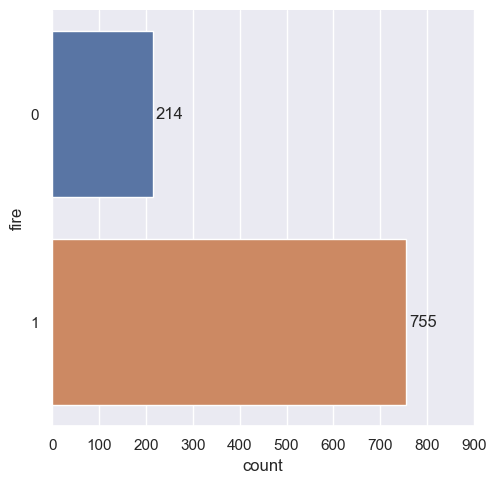

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Creat plot
g = sb.catplot(y = 'fire', data = filtered_data, kind = 'count')

# Adjust x-axis limits
g.ax.set_xlim(0, 900)

# Add annotations to each bar
for p in g.ax.patches:
    g.ax.annotate(int(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha = 'center', va = 'center', 
                   xytext = (12, 0), 
                   textcoords = 'offset points')

# Show the plot
plt.show()

<font size="3">The dataset predominantly comprises images containing fire. To ensure unbiased results, we will <b>rebalance</b> the dataset by <b>undersampling the fire images</b>, ensuring a balanced representation of fire and non-fire images. Undersampling helps prevent overfitting and ensures a more accurate reflection of the true distribution of the minority class.</font>

## Resample Of Data

In [16]:
from sklearn.utils import resample

# Separate majority and minority classes
fire_majority = filtered_data[filtered_data['fire'] == 1]
non_fire_minority = filtered_data[filtered_data['fire'] == 0]

# Downsample the majority class (fire) to match the minority class (non-fire)
fire_downsampled = resample(fire_majority, 
                            replace=False,    # sample without replacement
                            n_samples=len(non_fire_minority),    # match the number in minority class
                            random_state=42)  # reproducible results

# Combine downsampled majority class with minority class
balanced_data = pd.concat([fire_downsampled, non_fire_minority])

# Confirm balanced class distribution
print(balanced_data['fire'].value_counts())

fire
1    214
0    214
Name: count, dtype: int64


## Spread Of Data From Predictors

In [17]:
balanced_data[['avg_r','avg_g','avg_b', 'avg_h', 'avg_s', 'avg_v']].describe()

,avg_r,avg_g,avg_b,avg_h,avg_s,avg_v
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,133.470890,92.831295,56.836441,31.713706,56.173270,52.342086
std,34.820230,29.307002,28.945435,8.720550,20.251087,13.654680
min,57.555046,23.452839,3.316530,11.492704,21.644669,22.570606
25%,108.006550,73.353668,39.438036,24.745193,39.312459,42.355533
50%,131.210286,89.442618,54.164388,31.140796,53.917436,51.455014
75%,155.977221,110.693383,74.380647,39.479559,70.578297,61.167538
max,232.425532,215.276596,173.602202,48.978649,97.635720,91.147267


In [18]:
balanced_data[['std_r','std_g','std_b', 'std_h', 'std_s', 'std_v']].describe()

,std_r,std_g,std_b,std_h,std_s,std_v
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,43.644851,37.790672,28.869631,72.794172,33.273356,17.572413
std,15.514904,13.807136,12.065489,53.751699,20.195172,6.341220
min,4.366425,4.227743,4.353602,11.926270,2.126309,1.852131
25%,32.459345,28.191040,20.270505,40.033125,16.919101,12.934033
50%,44.648518,37.734081,27.890134,55.535950,28.422866,17.833176
75%,57.010571,46.724818,35.585036,83.903080,47.326310,22.778158
max,76.067808,71.158822,73.140436,341.895856,89.722975,32.038702


<font size="3">Above are numerical predictors for fire classification, these values are obtained from the blobbing operation of area that contains fire. By blobbing all the different areas within the image, it calculates and produces the average and standard deviation red, green, blue, hue, saturation and value.</font>

# Part 3: Data Driven Insights
---
<font size='3'>We will add all predictors into an array and plot them using boxplot to identify relations between predictors and response.</font>

In [19]:
# All Predictors and Response variable
predictors = ['size', 'avg_b', 'avg_g', 'avg_r', 'avg_h', 'avg_s', 'avg_v', 'std_b', 'std_g', 'std_r', 'std_h', 'std_s', 'std_v']
X = balanced_data[predictors]
y = balanced_data['fire']

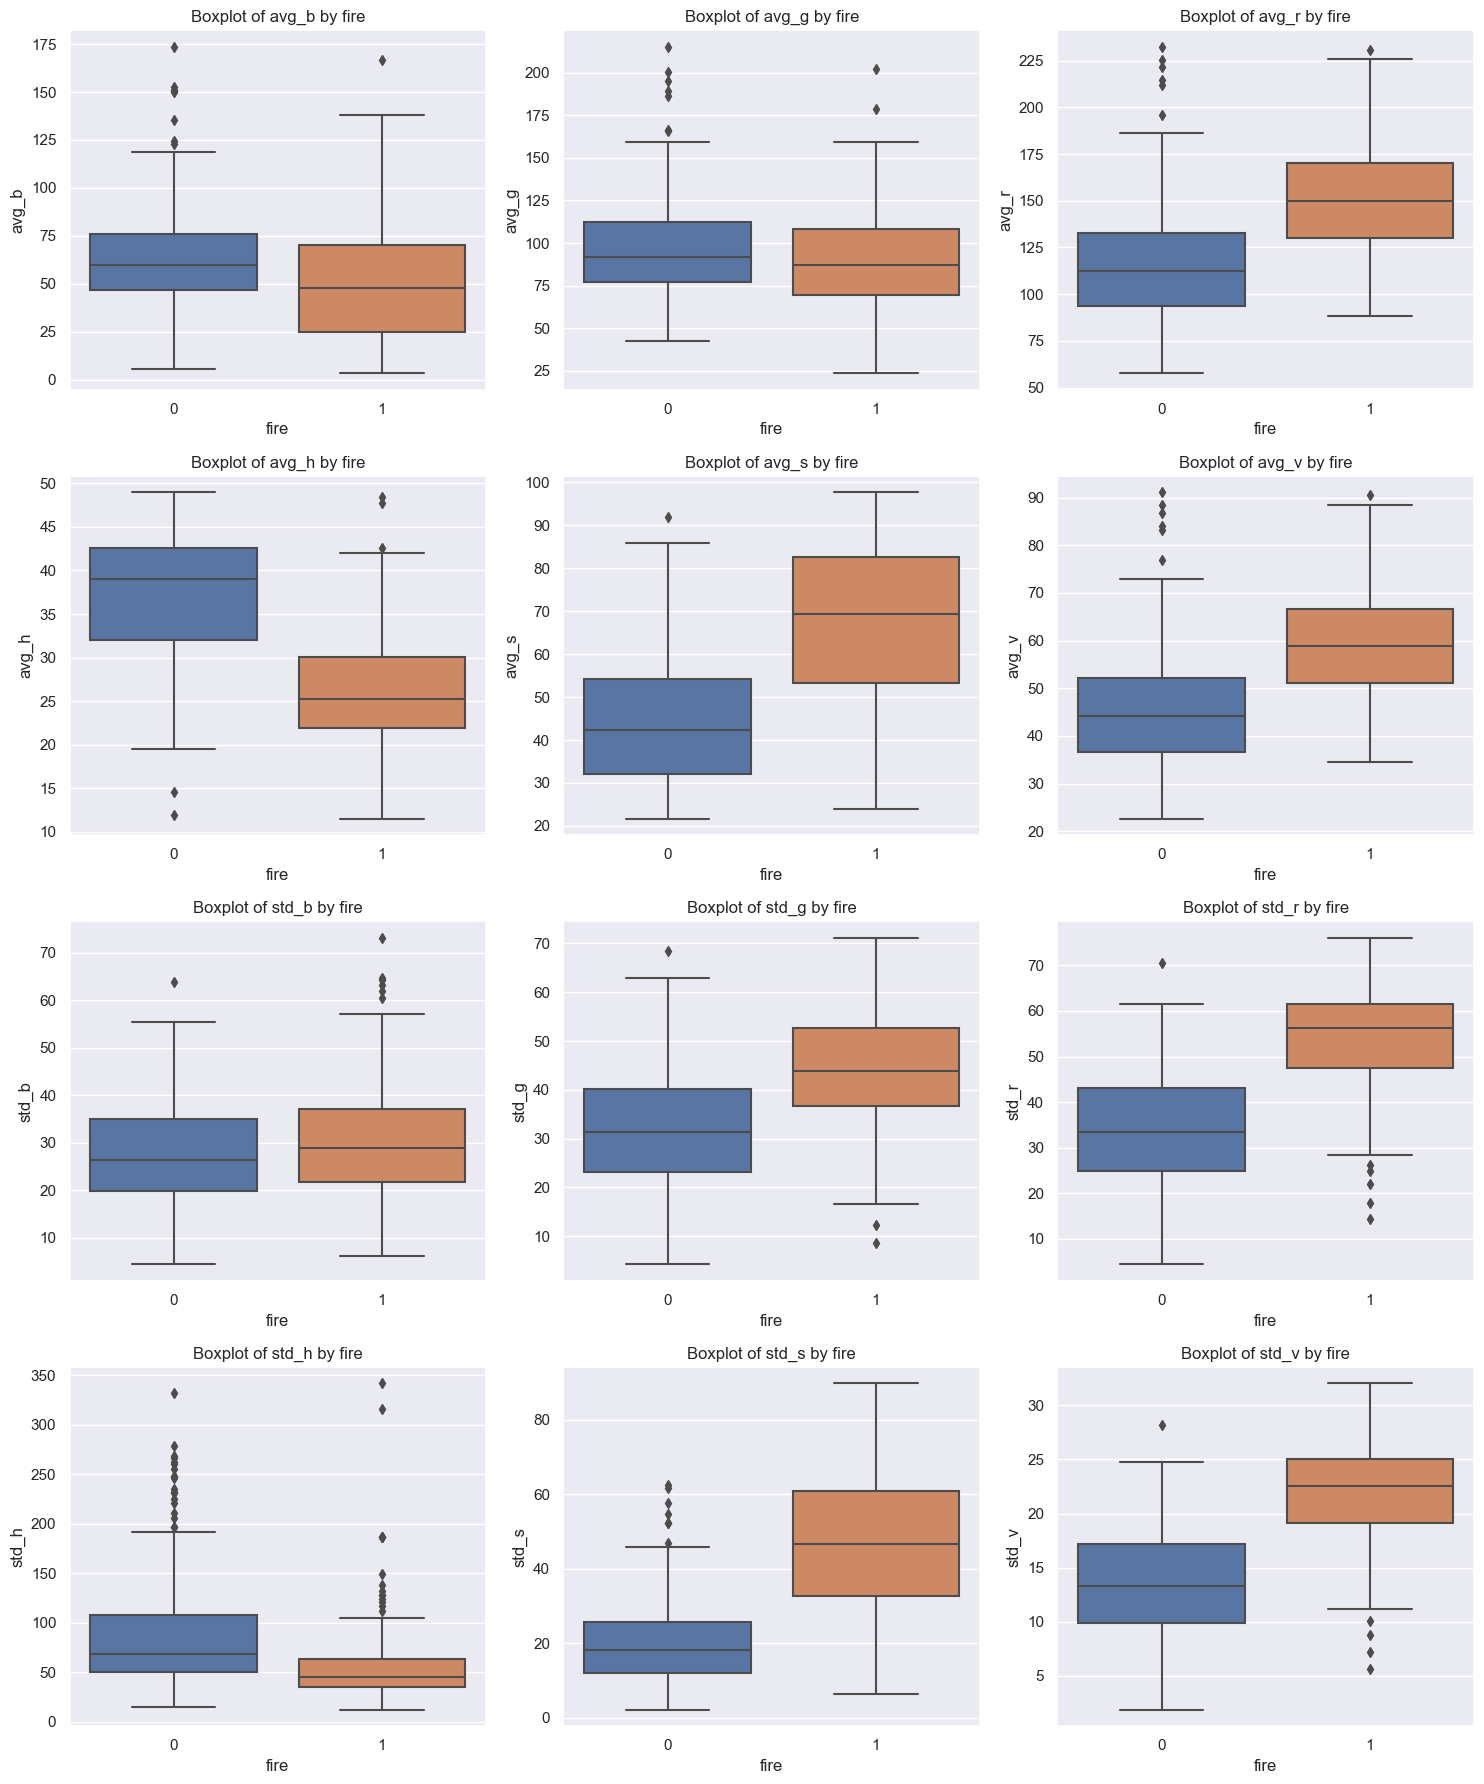

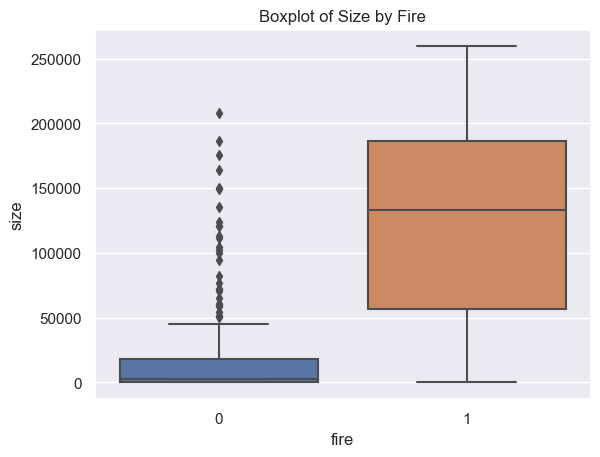

In [20]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

# Select 'avg' and 'std' predictors
avg_predictors = [col for col in balanced_data.columns if 'avg' in col]
std_predictors = [col for col in balanced_data.columns if 'std' in col]

# Plot box plots for 'avg' predictors
for i, predictor in enumerate(avg_predictors):
    sb.boxplot(x='fire', y=predictor, data=balanced_data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Boxplot of {predictor} by fire')
    axes[i//3, i%3].set_xlabel('fire')
    axes[i//3, i%3].set_ylabel(predictor)

# Plot box plots for 'std' predictors
for i, predictor in enumerate(std_predictors):
    sb.boxplot(x='fire', y=predictor, data=balanced_data, ax=axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3])
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_title(f'Boxplot of {predictor} by fire')
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_xlabel('fire')
    axes[(i+len(avg_predictors))//3, (i+len(avg_predictors))%3].set_ylabel(predictor)

# Adjust layout
plt.tight_layout()
plt.show()

# Create boxplot for comparing size and fire
sb.boxplot(x='fire', y='size', data=balanced_data)
plt.title('Boxplot of Size by Fire')
plt.show()

# # Create swarm plots for each predictor
# for predictor in predictors:
#     plt.figure(figsize=(10, 6))
#     sb.swarmplot(x=y, y=predictor, data=balanced_data)
#     plt.title(f'Swarmplot of {predictor} by {y}')
#     plt.xlabel('fire')
#     plt.ylabel(predictor)
#     plt.show()

<font size="3">After analyzing all the box plots, we have determined that <code>std_s</code> and <code>avg_r</code> are the most suitable predictors for the response variable. Other variables either exhibit too many outliers or lack clear differences in data spread between fire and non-fire instances, making them less suitable as predictors.</font>

In [21]:
# Selected Predictors for the Response variable
predictors = ['std_s', 'avg_r']
X = balanced_data[predictors]

# Part 4: Importing Scikit-learn To Train Random Forest Classifier Model
---
<font size="3">We choosed Random Classifier Model as it can handle non-linear relationships and interactions between large amount of features effectively.</font>

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [34]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<font size="3">Normalizing the range of features in dataset to ensure all features contribute equally to the model. This prevents domination of features by larger values.</font>

In [35]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [37]:
# Make predictions on the training and test set
y_train_pred = rf_classifier.predict(X_train_scaled)
y_test_pred = rf_classifier.predict(X_test_scaled)

In [38]:
# Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [39]:
# Calculate confusion matrix for both training and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Part 5: Goodness Of Fit Of The Model
---
<font size='3'>We will now check if the preictions on the Train & Test Set are good
Metrics Used: Classification Accuracy and Confusion Matrix</font>

Classification Accuracy in train data 	: 1.0
Classification Accuracy in test data 	: 0.8488372093023255
TPR for train	: 1.0
FPR for train	: 0.0
TPR for test	: 0.8043478260869565
FPR for test	: 0.1


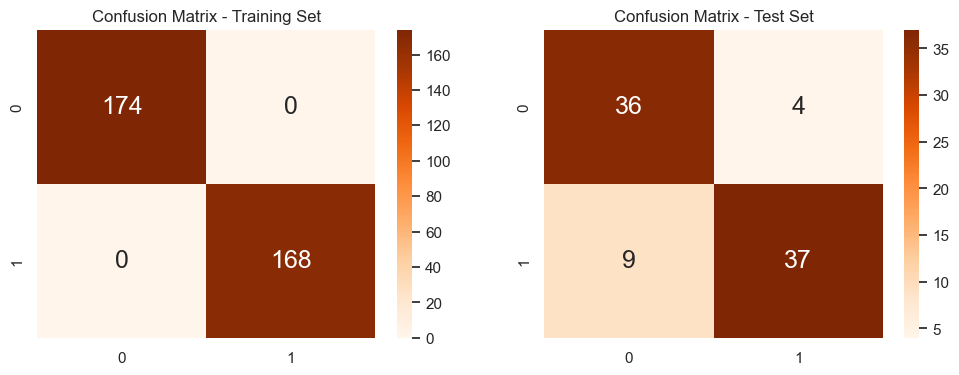

In [40]:
# Function to obtain values of TN, FN, FP, TP, TPR & FPR
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR

# Using above function to produce the TPR & FPR, storing it into that 2 elements array
[TPR_train, FPR_train] = binary_metric(y_train, y_train_pred)
[TPR_test, FPR_test] = binary_metric(y_test, y_test_pred)

# Prints classification accuracy, TPR and FPR of train and test
print("Classification Accuracy in train data \t:", accuracy_score(y_train, y_train_pred))
print("Classification Accuracy in test data \t:", accuracy_score(y_test, y_test_pred))
print("TPR for train\t:", [TPR_train, FPR_train][0])
print("FPR for train\t:", [TPR_train, FPR_train][1])
print("TPR for test\t:", [TPR_test, FPR_test][0])
print("FPR for test\t:", [TPR_test, FPR_test][1])

# Create subplots space for confusion matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot confusion matrix for training set
sb.heatmap(conf_matrix_train, annot=True, fmt='d', annot_kws={"size" : 18}, cmap='Oranges', ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')

# Plot confusion matrix for test set
sb.heatmap(conf_matrix_test, annot=True, fmt='d', annot_kws={"size" : 18}, cmap='Oranges', ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
plt.show()

In [529]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sb

# # Select predictors and response variable
# predictors = ['std_s', 'avg_r']
# X = balanced_data[predictors]
# y = balanced_data['fire']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Create the decision tree classifier
# tree_classifier = DecisionTreeClassifier()

# # Fit the classifier to the training data
# tree_classifier.fit(X_train, y_train)

# # Make predictions on the training set
# y_train_pred = tree_classifier.predict(X_train)

# # Make predictions on the testing set
# y_test_pred = tree_classifier.predict(X_test)

# # Calculate accuracy for training set
# accuracy_train = accuracy_score(y_train, y_train_pred)
# print("Accuracy on Training Set:", accuracy_train)

# # Function to obtain values of TN, FN, FP, TP, TPR & FPR
# def binary_metric(y_true, y_pred):
#     CM = confusion_matrix(y_true, y_pred)
#     TN = CM[0][0]
#     FN = CM[1][0]
#     TP = CM[1][1]
#     FP = CM[0][1]
#     TPR = TP / (TP + FN)
#     FPR = FP / (FP + TN)
#     return TPR, FPR

# # Using above function to produce the TPR & FPR, storing it into that 2 elements array
# [TPR_train, FPR_train] = binary_metric(y_train, y_train_pred)
# [TPR_test, FPR_test] = binary_metric(y_test, y_test_pred)

# # Prints classification accuracy, TPR and FPR of train and test
# print("Classification Accuracy in train data \t:", accuracy_score(y_train, y_train_pred))
# print("Classification Accuracy in test data \t:", accuracy_score(y_test, y_test_pred))
# print("TPR for train\t:", [TPR_train, FPR_train][0])
# print("FPR for train\t:", [TPR_train, FPR_train][1])
# print("TPR for test\t:", [TPR_test, FPR_test][0])
# print("FPR for test\t:", [TPR_test, FPR_test][1])

# # Create subplots space for confusion matrix
# f, axes = plt.subplots(1, 2, figsize=(12, 4))

# # Plot confusion matrix for training set
# sb.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=axes[0])
# axes[0].set_title('Confusion Matrix - Training Set')

# # Calculate accuracy for testing set
# accuracy_test = accuracy_score(y_test, y_test_pred)
# print("Accuracy on Testing Set:", accuracy_test)

# # Plot confusion matrix for testing set
# sb.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=axes[1])
# axes[1].set_title('Confusion Matrix - Testing Set')
# plt.show()


In [430]:
# Plot the decision tree
# plt.figure(figsize=(15, 10))
# plot_tree(tree_classifier, feature_names=predictors, class_names=["Not Fire", "Fire"], filled=True)
# plt.title("Classification Tree")
# plt.show()